<a href="https://colab.research.google.com/github/chewzzz1014/DPhi-Bootcamp/blob/master/bootcamps/DS_Bootcamp_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [47]:
tax_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [48]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv")
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


# **EDA**

In [49]:
# set column "Unnamed: 0" as index

tax_data = tax_data.set_index("Unnamed: 0", drop=True)
tax_data.index.name="TaxPayer"

test_data = test_data.set_index("Unnamed: 0", drop=True)
test_data.index.name="TaxPayer"

In [50]:
tax_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
TaxPayer,,,,,,,,,,
61,183414,-12402,1,2,28,1,0,0,1,Democrat
501,129786,700251,2,5,63,3,0,0,0,Republican
658,268343,493411,2,4,44,1,1,0,1,Independent
703,290506,-433408,1,1,28,5,1,0,1,Republican
702,90108,907135,1,3,57,5,1,1,0,Democrat


In [51]:
test_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
TaxPayer,,,,,,,,,
17,253274,-633752,2,1,94,3,0,1,1
590,47107,322850,0,1,30,2,1,1,0
224,111874,300583,0,2,46,3,0,1,1
960,96670,107419,0,3,77,5,0,0,0
57,128669,341273,0,0,92,4,1,1,1


In [52]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 61 to 635
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             803 non-null    int64 
 1   HHDL            803 non-null    int64 
 2   Married         803 non-null    int64 
 3   CollegGrads     803 non-null    int64 
 4   AHHAge          803 non-null    int64 
 5   Cars            803 non-null    int64 
 6   Filed in 2017   803 non-null    int64 
 7   Filed in 2016   803 non-null    int64 
 8   Filed in 2015   803 non-null    int64 
 9   PoliticalParty  803 non-null    object
dtypes: int64(9), object(1)
memory usage: 69.0+ KB


In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 17 to 528
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHI            201 non-null    int64
 1   HHDL           201 non-null    int64
 2   Married        201 non-null    int64
 3   CollegGrads    201 non-null    int64
 4   AHHAge         201 non-null    int64
 5   Cars           201 non-null    int64
 6   Filed in 2017  201 non-null    int64
 7   Filed in 2016  201 non-null    int64
 8   Filed in 2015  201 non-null    int64
dtypes: int64(9)
memory usage: 15.7 KB


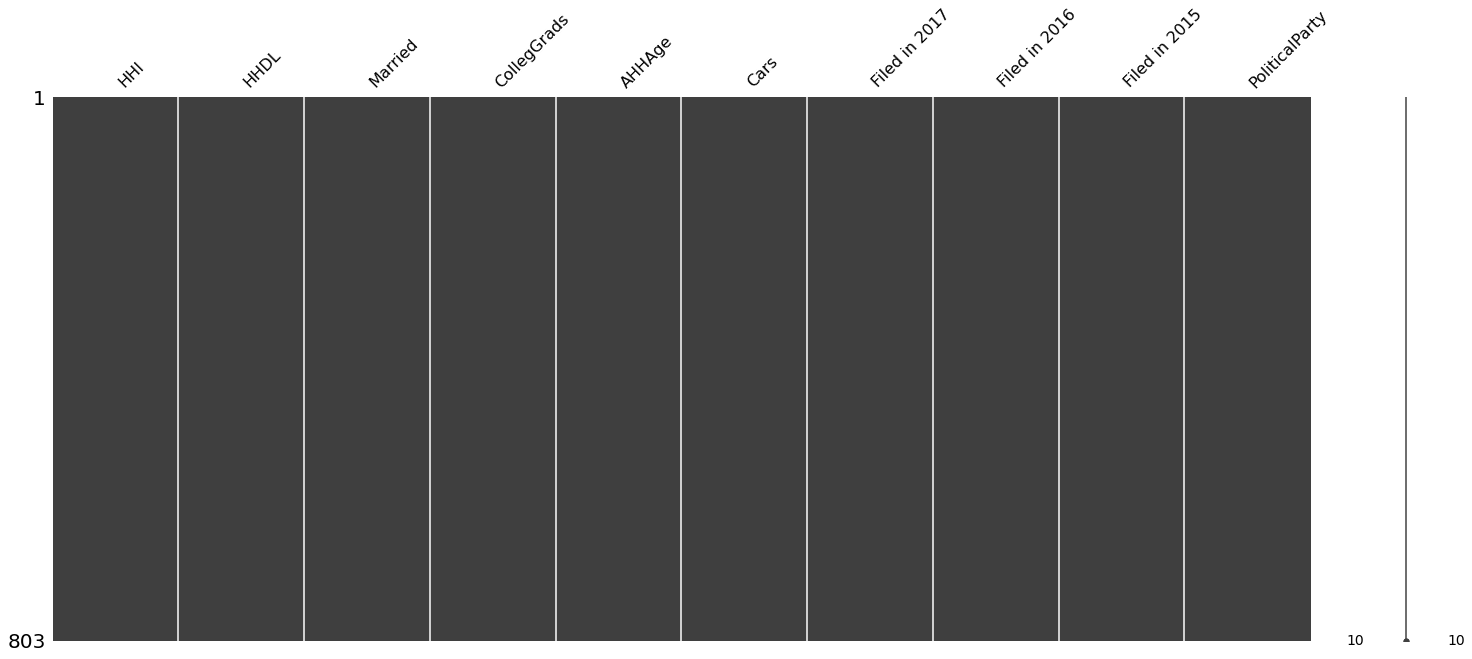

In [10]:
# no missing values
msno.matrix(tax_data)

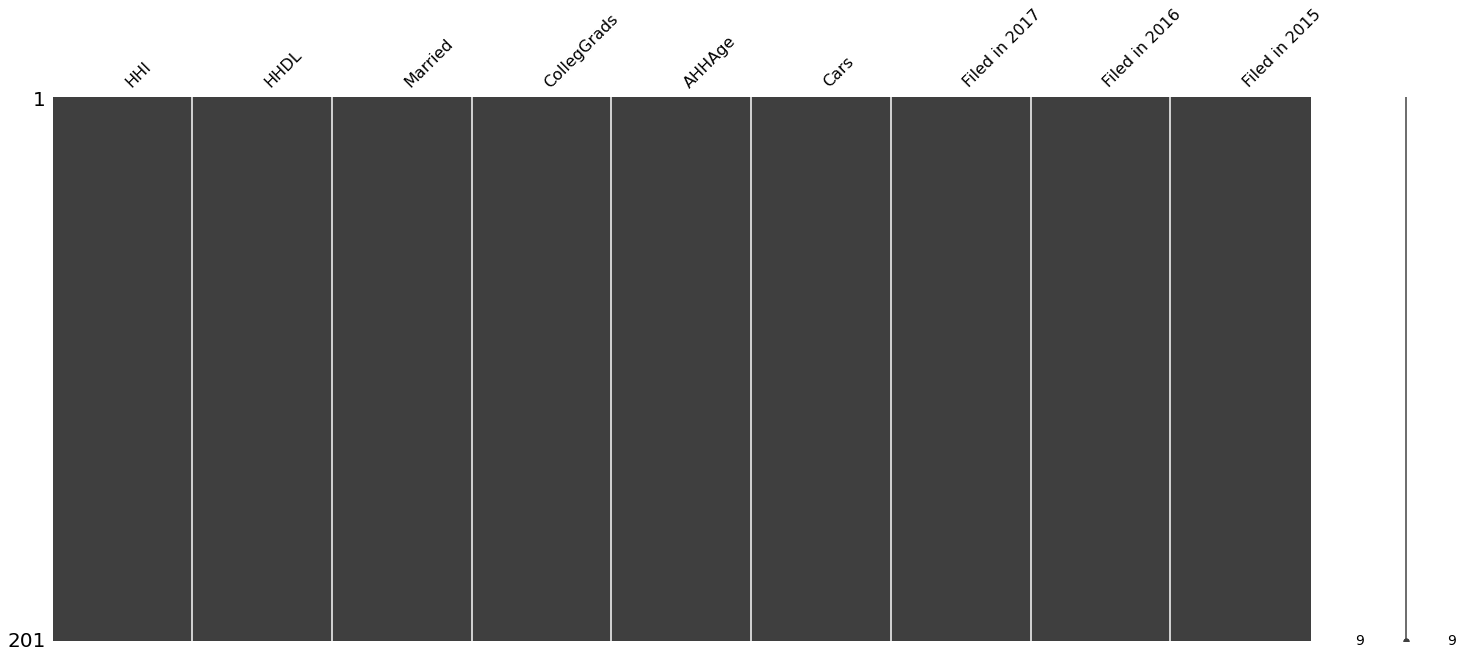

In [11]:
# no missing values
msno.matrix(test_data)

In [12]:
tax_data.describe()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [13]:
test_data.describe()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


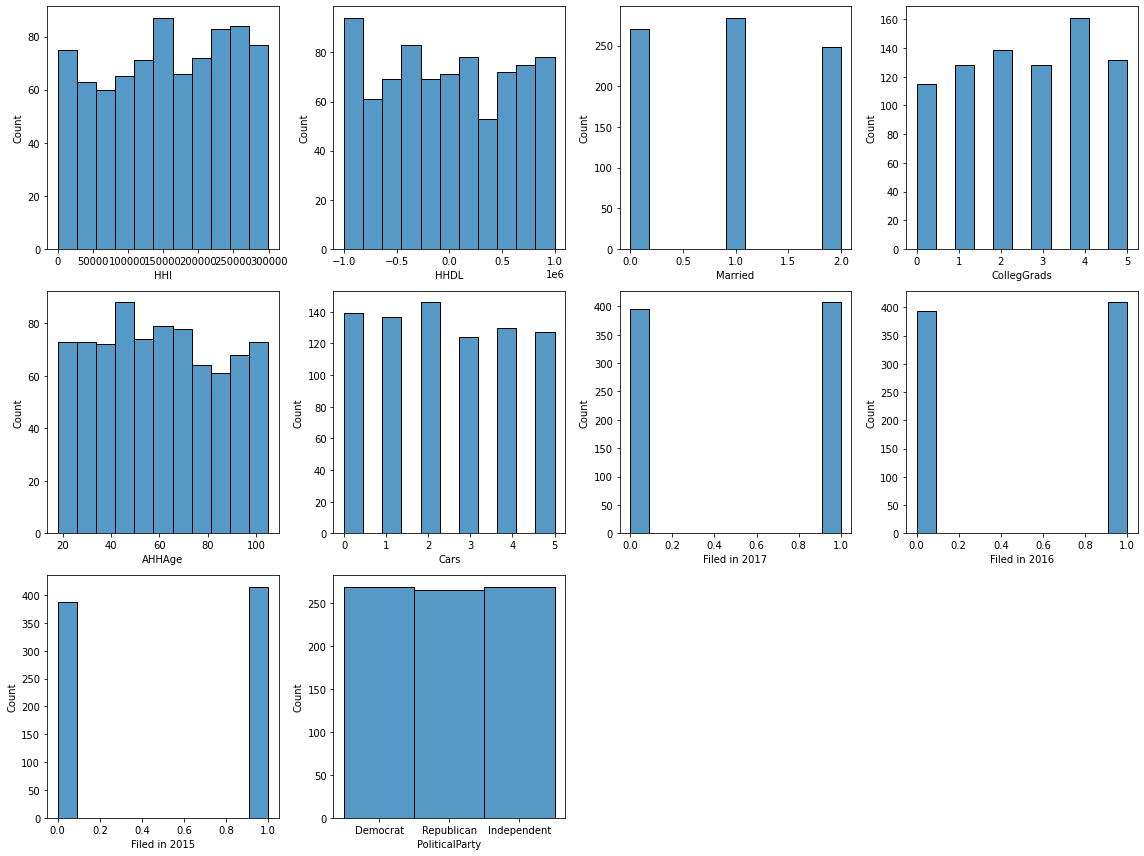

In [19]:
# scatter plot of all attributes in tax_data

plt.figure(figsize=(16, 12))
n_plots = len(tax_data.columns)
n_cols = 4
n_rows = n_plots // n_cols + 1

for idx, col in enumerate(tax_data.columns):
  ax = plt.subplot(n_rows, n_cols, idx+1)
  sns.histplot ( data=tax_data, x = tax_data.columns[idx], ax = ax)

plt.tight_layout()

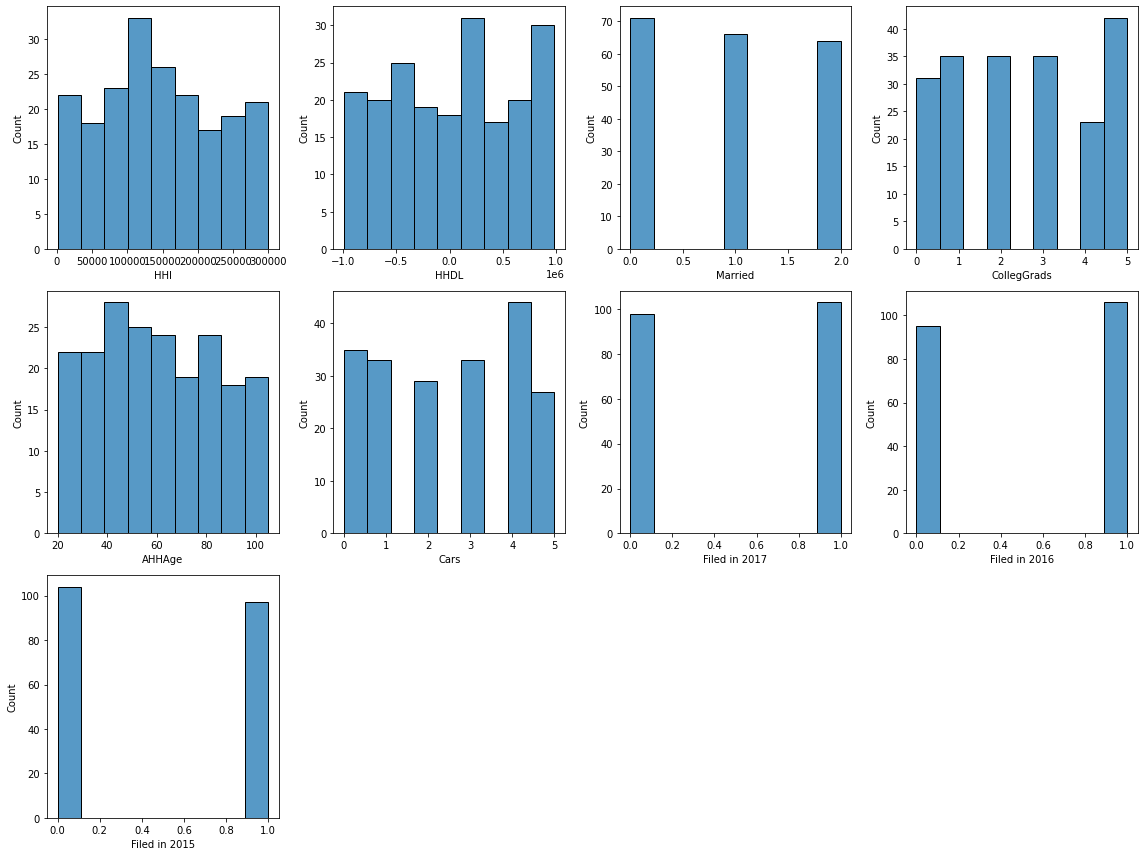

In [18]:
# scatter plot of all attributes in test_data

plt.figure(figsize=(16, 12))
n_plots = len(test_data.columns)
n_cols = 4
n_rows = n_plots // n_cols + 1

for idx, col in enumerate(test_data.columns):
  ax = plt.subplot(n_rows, n_cols, idx+1)
  sns.histplot ( data=test_data, x = test_data.columns[idx], ax = ax)

plt.tight_layout()

In [21]:
# number of unique values of each attribute
for col in tax_data.columns:
  print("{} has {} unique values".format(col, tax_data[col].nunique()))

print()

for col in test_data.columns:
  print("{} has {} unique values".format(col, test_data[col].nunique()))

HHI has 802 unique values
HHDL has 803 unique values
Married has 3 unique values
CollegGrads has 6 unique values
AHHAge has 88 unique values
Cars has 6 unique values
Filed in 2017 has 2 unique values
Filed in 2016 has 2 unique values
Filed in 2015 has 2 unique values
PoliticalParty has 3 unique values

HHI has 201 unique values
HHDL has 201 unique values
Married has 3 unique values
CollegGrads has 6 unique values
AHHAge has 75 unique values
Cars has 6 unique values
Filed in 2017 has 2 unique values
Filed in 2016 has 2 unique values
Filed in 2015 has 2 unique values


In [22]:
# list out the unique values of political party
tax_data["PoliticalParty"].value_counts()

Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

In [56]:
# convert categorical values to numerical values in PoliticalParty column
# Democrat -> 0
# Independent  -> 1
# Republican -> 2

tax_data["PoliticalParty"].replace(to_replace=["Democrat", "Independent", "Republican"], value=[0, 1, 2], inplace =True)

tax_data["PoliticalParty"].value_counts()

0    269
1    269
2    265
Name: PoliticalParty, dtype: int64

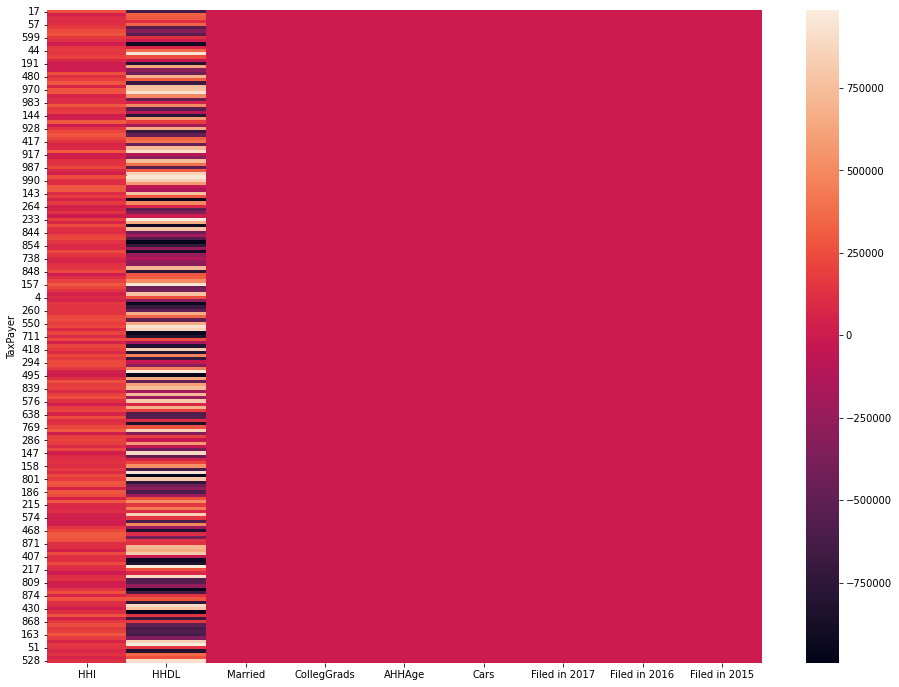

In [61]:
plt.figure(figsize=(16,12))
sns.heatmap(test_data)

In [83]:
# normalize the values in all columns except PoliticalParty
from sklearn.preprocessing import StandardScaler

X = tax_data.drop("PoliticalParty", axis = 1)
y = tax_data["PoliticalParty"]

scaler = StandardScaler()
tax_data.iloc[:, :-1] = scaler.fit_transform(tax_data.iloc[:, :-1].to_numpy())
tax_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
TaxPayer,,,,,,,,,,
61,0.322956,0.004958,0.035650,-0.362938,-1.299476,-0.843396,-1.013794,-1.018858,0.966923,-1.220187
501,-0.295347,1.203070,1.280308,1.428697,0.097417,0.331360,-1.013794,-1.018858,-1.034209,1.232404
658,1.302144,0.855331,1.280308,0.831485,-0.660896,-0.843396,0.986394,-1.018858,0.966923,0.006109
703,1.557672,-0.702837,0.035650,-0.960150,-1.299476,1.506117,0.986394,-1.018858,0.966923,1.232404
702,-0.752815,1.550883,0.035650,0.234274,-0.142050,1.506117,0.986394,0.981491,-1.034209,-1.220187


In [67]:
test_data.iloc[:, :] = scaler.fit_transform(test_data.iloc[:, :].to_numpy())
test_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
TaxPayer,,,,,,,,,
17,1.288712,-1.127932,1.263837,-0.892720,1.393200,0.299710,-1.025193,0.946692,1.035454
590,-1.188518,0.502492,-1.178771,-0.892720,-1.280547,-0.290895,0.975426,0.946692,-0.965760
224,-0.410301,0.464541,-1.178771,-0.315753,-0.612110,0.299710,-1.025193,0.946692,1.035454
960,-0.592987,0.135313,-1.178771,0.261214,0.682986,1.480919,-1.025193,-1.056309,-0.965760
57,-0.208498,0.533892,-1.178771,-1.469688,1.309646,0.890314,0.975426,0.946692,1.035454


**Split into Train Set and Test Set**

In [69]:
from sklearn.model_selection import train_test_split

X = tax_data.drop("PoliticalParty", axis = 1)
y = tax_data["PoliticalParty"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
print("{} has shape {}".format("X_train", X_train.shape))
print("{} has shape {}".format("X_test", X_test.shape))
print("{} has shape {}".format("y_train", y_train.shape))
print("{} has shape {}".format("y_test", y_test.shape))

X_train has shape (642, 9)
X_test has shape (161, 9)
y_train has shape (642,)
y_test has shape (161,)


In [ ]:
# attempt multiple machine model and pick the model with highest accuracy score
scores = {}

**Decision Tree Classifier**

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()

# train model
dt_model.fit(X_train, y_train)

# predict
dt_prediction = dt_model.predict(X_test)

# accuracy score
scores["DecisionTreeClassifier"] = accuracy_score(y_test, dt_prediction)

ValueError: ignored